<a href="https://colab.research.google.com/github/Arjun-Gyawali/AI-ML/blob/main/AI%26ML_Workshop4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/data.zip -d /content/dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/DevanagariHandwrittenDigitDataset/Train/digit_7/10299.png  
  inflating: /content/dataset/DevanagariHandwrittenDigitDataset/Train/digit_7/10300.png  
  inflating: /content/dataset/DevanagariHandwrittenDigitDataset/Train/digit_7/10301.png  
  inflating: /content/dataset/DevanagariHandwrittenDigitDataset/Train/digit_7/10302.png  
  inflating: /content/dataset/DevanagariHandwrittenDigitDataset/Train/digit_7/10303.png  
  inflating: /content/dataset/DevanagariHandwrittenDigitDataset/Train/digit_7/10304.png  
  inflating: /content/dataset/DevanagariHandwrittenDigitDataset/Train/digit_7/10306.png  
  inflating: /content/dataset/DevanagariHandwrittenDigitDataset/Train/digit_7/10307.png  
  inflating: /content/dataset/DevanagariHandwrittenDigitDataset/Train/digit_7/104017.png  
  inflating: /content/dataset/DevanagariHandwrittenDigitDataset/Train/digit_7/104018.png  
  inflating: /content/dataset/DevanagariHandwri

In [ ]:
import os
print(os.listdir('/content/dataset'))


['DevanagariHandwrittenDigitDataset']


In [ ]:
import os

dataset_path = "/content/dataset"

image_extensions = ('.png', '.jpg', '.jpeg')
image_count = sum([len(files) for _, _, files in os.walk(dataset_path) if any(file.endswith(image_extensions) for file in files)])

print(f"Total number of images in the dataset: {image_count}")


Total number of images in the dataset: 20000


Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


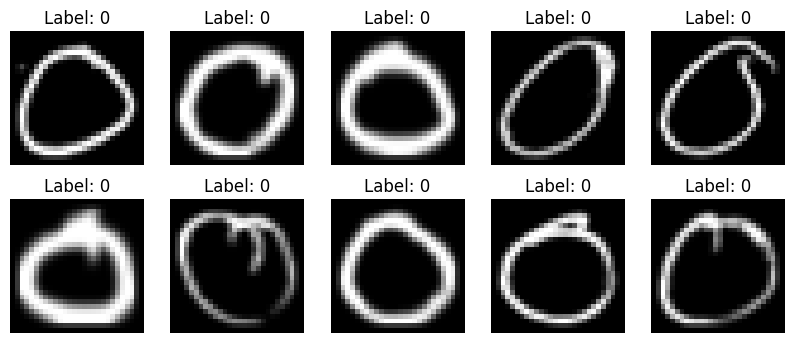

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image  # Import Pillow

# Define dataset paths
train_dir = "/content/dataset/DevanagariHandwrittenDigitDataset/Train/"
test_dir = "/content/dataset/DevanagariHandwrittenDigitDataset/Test/"

# Define image size
img_height, img_width = 28, 28

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))  # Sorted class names (digit_0, digit_1, ...)
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)

            # Load image using PIL
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize((img_width, img_height))  # Resize to (28,28)
            img = np.array(img) / 255.0  # Normalize pixel values to [0,1]

            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)  # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")

plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define the Fully Connected Network (FCN)
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Convert image to a flat vector
    Dense(64, activation='sigmoid'),  # First hidden layer with 64 neurons
    Dense(128, activation='sigmoid'),  # Second hidden layer with 128 neurons
    Dense(256, activation='sigmoid'),  # Third hidden layer with 256 neurons
    Dense(10, activation='softmax')  # Output layer with 10 classes (softmax activation)
])

# Print Model Summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the Model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
# Train the Model
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    verbose=2
)


Epoch 1/20
107/107 - 3s - 27ms/step - accuracy: 0.4833 - loss: 1.6099 - val_accuracy: 0.0000e+00 - val_loss: 7.0595
Epoch 2/20
107/107 - 1s - 7ms/step - accuracy: 0.8293 - loss: 0.5211 - val_accuracy: 0.0000e+00 - val_loss: 8.1779
Epoch 3/20
107/107 - 1s - 13ms/step - accuracy: 0.9010 - loss: 0.2959 - val_accuracy: 0.0000e+00 - val_loss: 9.0279
Epoch 4/20
107/107 - 1s - 7ms/step - accuracy: 0.9418 - loss: 0.1978 - val_accuracy: 0.0000e+00 - val_loss: 9.4184
Epoch 5/20
107/107 - 1s - 7ms/step - accuracy: 0.9570 - loss: 0.1482 - val_accuracy: 0.0000e+00 - val_loss: 9.6909
Epoch 6/20
107/107 - 1s - 7ms/step - accuracy: 0.9662 - loss: 0.1183 - val_accuracy: 0.0000e+00 - val_loss: 9.9316
Epoch 7/20
107/107 - 1s - 7ms/step - accuracy: 0.9732 - loss: 0.0958 - val_accuracy: 0.0000e+00 - val_loss: 10.0060
Epoch 8/20
107/107 - 1s - 7ms/step - accuracy: 0.9785 - loss: 0.0798 - val_accuracy: 0.0000e+00 - val_loss: 10.2748
Epoch 9/20
107/107 - 1s - 11ms/step - accuracy: 0.9819 - loss: 0.0671 - val_

In [ ]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


94/94 - 0s - 3ms/step - accuracy: 0.7807 - loss: 2.4622
Test Accuracy: 0.7807


In [ ]:
# Save the Model
model.save("devnagari_fcn_model.h5")

# Load the Model
from tensorflow.keras.models import load_model
loaded_model = load_model("devnagari_fcn_model.h5")

# Re-evaluate the loaded model
test_loss, test_acc = loaded_model.evaluate(x_test, y_test, verbose=2)
print(f"Re-evaluated Test Accuracy: {test_acc:.4f}")


94/94 - 1s - 7ms/step - accuracy: 0.7807 - loss: 2.4622
Re-evaluated Test Accuracy: 0.7807


In [ ]:
# Make Predictions
predictions = model.predict(x_test)

# Convert predictions from probabilities to labels
predicted_labels = np.argmax(predictions, axis=1)

# Display the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Predicted label for first image: 0
True label for first image: 0


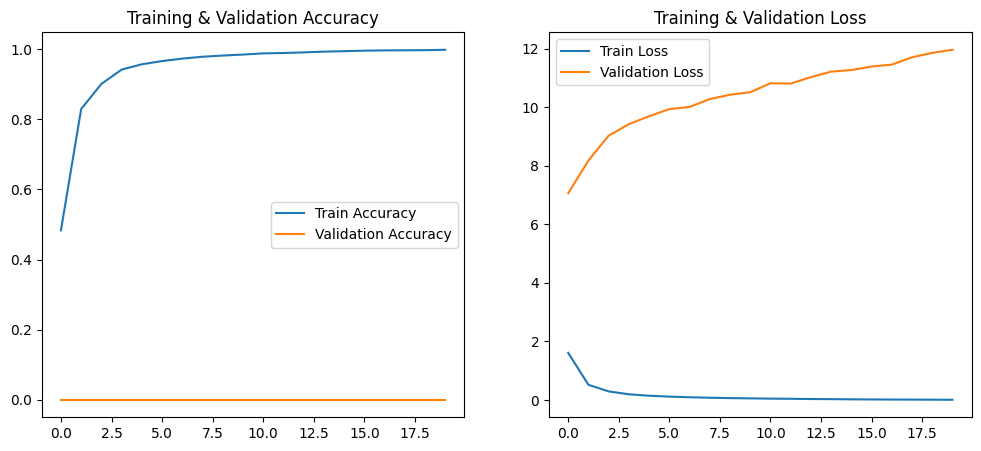

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training & Validation Accuracy")

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training & Validation Loss")

plt.show()
